# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import pprint
import random

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# Save config information.
#cities = ['amderma', 'victoria', 'rocha']
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
cities_list = []
cloudiness_list = []
countries = []
dates = []
humidity_list = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
counter = 1
set_counter = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        print(city)
        print(f"Processing record {counter} of Set {set_counter} | {city}")
        response = requests.get(query_url + city).json()
        #pprint.pprint(response)
        cities_list.append(response['name'])
        countries.append(response['sys']['country'])
        cloudiness_list.append(response['clouds']['all'])
        dates.append(response['dt'])
        humidity_list.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        
    # Handle exceptions for a character that is not available in the Star Wars API
    except Exception as exp: 
        # Append null values
        print("City not found, skipping...", exp)
        pass
    counter = counter + 1
    if counter % 50 == 0:
        set_counter = set_counter + 1
        print(set_counter)
        counter = 1
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
-------------------------------
ixtapa
Processing record 1 of Set 1 | ixtapa
sao filipe
Processing record 2 of Set 1 | sao filipe
hilo
Processing record 3 of Set 1 | hilo
georgetown
Processing record 4 of Set 1 | georgetown
astoria
Processing record 5 of Set 1 | astoria
marrakesh
Processing record 6 of Set 1 | marrakesh
severo-kurilsk
Processing record 7 of Set 1 | severo-kurilsk
bengkulu
Processing record 8 of Set 1 | bengkulu
zapolyarnyy
Processing record 9 of Set 1 | zapolyarnyy
albany
Processing record 10 of Set 1 | albany
san carlos de bariloche
Processing record 11 of Set 1 | san carlos de bariloche
prince rupert
Processing record 12 of Set 1 | prince rupert
torbay
Processing record 13 of Set 1 | torbay
namatanai
Processing record 14 of Set 1 | namatanai
saskylakh
Processing record 15 of Set 1 | saskylakh
najran
Processing record 16 of Set 1 | najran
kapaa
Processing record 17 of Set 1 | kapaa
yellowknife
Processing record 18 of Set 1 | yellowknife
vaini


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
#Create Dataframe
#Create a dataframe to store the data
#print(len(cities_list))
#print(len(countries))
cities_df = pd.DataFrame({'City': cities_list, 'Cloudiness': cloudiness_list, 'Country': countries, 'Date': dates,
                            'Humidity': humidity_list, 'Lat': lats, 'Lng': lngs, 'Max Temp': max_temps, 'Windspeed': wind_speeds})

#Preview the dataframe
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,Ixtapa,40,MX,1595303461,79,20.70,-105.20,84.2,3.36
1,São Filipe,41,CV,1595303461,82,14.90,-24.50,75.7,9.84
2,Hilo,90,US,1595303068,65,19.73,-155.09,82.4,8.05
3,George Town,20,MY,1595303199,79,5.41,100.34,87.8,4.70
4,Astoria,1,US,1595303402,82,46.19,-123.83,62.6,10.29


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
humidites_over_hundred = cities_df[cities_df['Humidity']>100]
indexes_to_drop = humidites_over_hundred.index
print(indexes_to_drop)

Int64Index([], dtype='int64')


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop(indexes_to_drop, inplace=False)
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,Ixtapa,40,MX,1595303461,79,20.70,-105.20,84.20,3.36
1,São Filipe,41,CV,1595303461,82,14.90,-24.50,75.70,9.84
2,Hilo,90,US,1595303068,65,19.73,-155.09,82.40,8.05
3,George Town,20,MY,1595303199,79,5.41,100.34,87.80,4.70
4,Astoria,1,US,1595303402,82,46.19,-123.83,62.60,10.29
...,...,...,...,...,...,...,...,...,...
564,Chengde,100,CN,1595303414,39,40.97,117.94,89.74,1.30
565,Jieshi,96,CN,1595303531,65,22.81,115.83,86.74,6.06
566,Cravo Norte,100,CO,1595303531,94,6.30,-70.20,72.82,2.51
567,Praia da Vitória,75,PT,1595303531,73,38.73,-27.07,69.80,3.85


In [9]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_data.index.name = 'City_ID'
clean_city_data.head()
clean_city_data.to_csv(output_data_file)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

FileNotFoundError: [Errno 2] No such file or directory: '../Weatherpy Images/Latitude vs. Max Temp 072020.png'

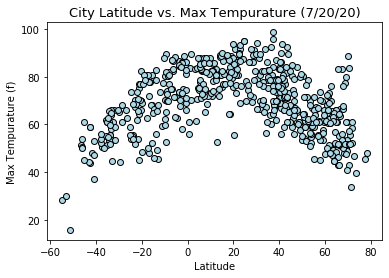

In [10]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(lats, max_temps, marker="o", facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Max Tempurature (7/20/20)', fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature (f)")

# Save image as PNG
plt.savefig("../Weatherpy Images/Latitude vs. Max Temp 072020.png")
plt.show()

## Latitude vs. Humidity Plot

In [ ]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(lats, humidity_list, marker="o", facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Humidity (7/20/20)', fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save image as PNG
plt.savefig("../Weatherpy Images/Latitude vs. Humidity 072020.png")
plt.show()

## Latitude vs. Cloudiness Plot

In [ ]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(lats, cloudiness_list, marker="o", facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Cloudiness (7/20/20)', fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save image as PNG
plt.savefig("../Weatherpy Images/Latitude vs. Cloudiness 072020.png")
plt.show()

## Latitude vs. Wind Speed Plot

In [ ]:
# Tell matplotlib to create a scatter plot based upon the above data
plt.scatter(lats, wind_speeds, marker="o", facecolors="lightblue", edgecolors="black")
plt.title('City Latitude vs. Wind Speed (7/20/20)', fontsize=13)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

# Save image as PNG
plt.savefig("../Weatherpy Images/Latitude vs. Wind Speed 072020.png")
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

# Create Northern Hemisphere DataFrame
northern_df = clean_city_data[clean_city_data['Lat'] > 0]
northern_df

# Create Southern Hemisphere DataFrame
southern_df = clean_city_data[clean_city_data['Lat'] < 0]
southern_df

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot for Max Temp vs Lat in the Northern Hemisphere
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (f)')
print(f"The r-squared is: {rvalue**2}")
print(f"Linear Regression model indicates that tempuratures are colder in cities located further north of the equator")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot for Max Temp vs Lat in the Southern Hemisphere
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (f)')
print(f"The r-squared is: {rvalue**2}")
print(f"Linear Regression model indicates that tempuratures are colder in cities located further south of the equator")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot for Humidity (%) vs Lat in the Northern Hemisphere
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(46,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
print(f"Linear Regression model indicates that humidity is not influenced by latitude")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot for Humidity (%) vs Lat in the Southern Hemisphere
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-56,26),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
print(f"Linear Regression model indicates that humidity increases the further south you move from the equator")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot for Cloudiness (%) vs Lat in the Northern Hemisphere
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
print(f"Linear Regression model indicates that there is no correlation between cloudiness and latitude north of the equator")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot for Cloudiness (%) vs Lat in the Southern Hemisphere
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-56,26),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
print(f"Linear Regression model indicates an increase in humidity as you move further south of the equator")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot for Wind Speed (mph) vs Lat in the Northern Hemisphere
x_values = northern_df['Lat']
y_values = northern_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
print(f"The r-squared is: {rvalue**2}")
print(f"Linear Regression model indicates that there is no correlation between wind speed and latitude north of the equator")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
# Add the linear regression equation and line to plot for Wind Speed (mph) vs Lat in the Southern Hemisphere
x_values = southern_df['Lat']
y_values = southern_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-56,23),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
print(f"The r-squared is: {rvalue**2}")
print(f"Linear Regression model indicates that there is no correlation between wind speed and latitude south of the equator")
plt.show()